<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Deksripsi-Dataset" data-toc-modified-id="Deksripsi-Dataset-1">Deksripsi Dataset</a></span></li><li><span><a href="#Import-Library" data-toc-modified-id="Import-Library-2">Import Library</a></span></li><li><span><a href="#Import-Dataset" data-toc-modified-id="Import-Dataset-3">Import Dataset</a></span></li><li><span><a href="#Scaling-Dataset" data-toc-modified-id="Scaling-Dataset-4">Scaling Dataset</a></span></li><li><span><a href="#Plot-Actual-Cluster" data-toc-modified-id="Plot-Actual-Cluster-5">Plot Actual Cluster</a></span></li><li><span><a href="#Clustering" data-toc-modified-id="Clustering-6">Clustering</a></span><ul class="toc-item"><li><span><a href="#KMeans" data-toc-modified-id="KMeans-6.1">KMeans</a></span></li><li><span><a href="#Spectral-Clustering" data-toc-modified-id="Spectral-Clustering-6.2">Spectral Clustering</a></span></li></ul></li><li><span><a href="#Kesimpulan" data-toc-modified-id="Kesimpulan-7">Kesimpulan</a></span></li><li><span><a href="#" data-toc-modified-id="-8"></a></span></li><li><span><a href="#Referensi" data-toc-modified-id="Referensi-9">Referensi</a></span></li></ul></div>

## Deksripsi Dataset

Pada tugas Clustering ini, saya menggunakan dataset **Seeds** dari Repository UCI Machine Learning. Dataset terdiri dari **7 feature predictor**, **1 feature target** dan **210 instance**. Feature class terdiri dari tiga jenis varietas gandum yaitu Kama, Rosa dan Canadian, masing-masing 70 instance. 

Persebaran varietas:
- instance 1-70 atau varieties **1** untuk **Kama**
- instance 71-140 atau varieties **2** untuk **Rosa**
- instance 141-210 atau varieties **3** untuk **Canadian**

Untuk informasi detail mengenai dataset dan mengunduh dataset dapat diakses pada URL berikut: [Seeds](https://archive.ics.uci.edu/ml/datasets/seeds)

## Import Library

In [1]:
import pandas as pd

## Import Dataset

In [2]:
# lokasi dataset
seeds_path = "../input/seeds/seeds_dataset.txt"

# informasi nama feature
colnames = ['area', 'perimeter', 'compactness', 'length_of_kernel', 'width_of_kernel', 
            'asymmetry_coefficient', 'length_of_kernel_groove', 'varieties']

# load dataset
df = pd.read_csv(seeds_path, 
                 sep='\t', 
                 names=colnames)

In [3]:
X = df.drop(columns='varieties')
y = df['varieties']

In [4]:
X.head()

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


Seperti terlihat pada dataframe diatas, nilai dari masing-masing feature berada pada rentang yang berbeda. Kita akan melakukan scaling agar nilai feature berada pada rentang yang sama (0, 1).

In [5]:
y.value_counts()

3    70
2    70
1    70
Name: varieties, dtype: int64

## Scaling Dataset

In [96]:
from sklearn.preprocessing import MinMaxScaler

In [97]:
# atur rentang nilai
scaler = MinMaxScaler(feature_range=(0, 1))

# tranformasi nilai feature ke range (0, 1)
X_scaled = scaler.fit_transform(X)

In [98]:
# konversi ke Dataframe
X_scaled = pd.DataFrame(data=X_scaled, 
                        columns=colnames[:-1])

X_scaled.head()

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove
0,0.440982,0.502066,0.570780,0.486486,0.486101,0.189302,0.345150
1,0.405099,0.446281,0.662432,0.368806,0.501069,0.032883,0.215165
2,0.349386,0.347107,0.879310,0.220721,0.503920,0.251453,0.150665
3,0.306893,0.316116,0.793103,0.239302,0.533856,0.194243,0.140817
4,0.524079,0.533058,0.864791,0.427365,0.664291,0.076701,0.322994


Kita telah melakukan scaling terhadap dataset. Sekarang setiap feature memiliki nilai pada rentang yang sama (0, 1)

## Plot Actual Cluster

Plot actual cluster ini akan digunakan untuk melihat perbedaan antara cluster actual (cluster sebenarnya) dan cluster yang dihasilkan oleh metode clustering **KMeans** dan **Apa**. Feature prediktor dataset seeds berdimensi 7 sehingga tidak mungkin untuk memvisualisasikan persebaran data point. Untuk itu, kita akan menggunakan **PCA (Principal Component Analysis)** untuk mereduksi dimensi dataset menjadi 2.

In [42]:
from sklearn.decomposition import PCA

In [43]:
# atur dimensi
pca = PCA(n_components=2)

# reduksi X_scale menjadi 2 dimensi
X_reduced = pca.fit_transform(X)

In [44]:
# konversi X_reduced ke DataFrame
X_reduced = pd.DataFrame(data=X_reduced,
                         columns=['PC_1', 'PC_2'])

X_reduce adalah dataframe dengan shape (210, 2). X_reduce akan digunakan sebagai data yang akan diklustering.

In [45]:
# copy dataframe X_reduce
df_actual = X_reduced.copy()

# assign feature varieties
df_actual['varieties'] = y

df_actual.head()

,PC_1,PC_2,varieties
0,0.663448,-1.417321,1
1,0.315667,-2.689229,1
2,-0.660499,-1.131506,1
3,-1.055276,-1.621190,1
4,1.619999,-2.183384,1


In [46]:
# konversi label varieties ke Nama varietas
# untuk informasi legend
df_actual['varieties'].replace(to_replace={1: 'Kama', 2: 'Rosa', 3: 'Canadian'}, 
                               inplace=True)
df_actual.head()

,PC_1,PC_2,varieties
0,0.663448,-1.417321,Kama
1,0.315667,-2.689229,Kama
2,-0.660499,-1.131506,Kama
3,-1.055276,-1.621190,Kama
4,1.619999,-2.183384,Kama


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

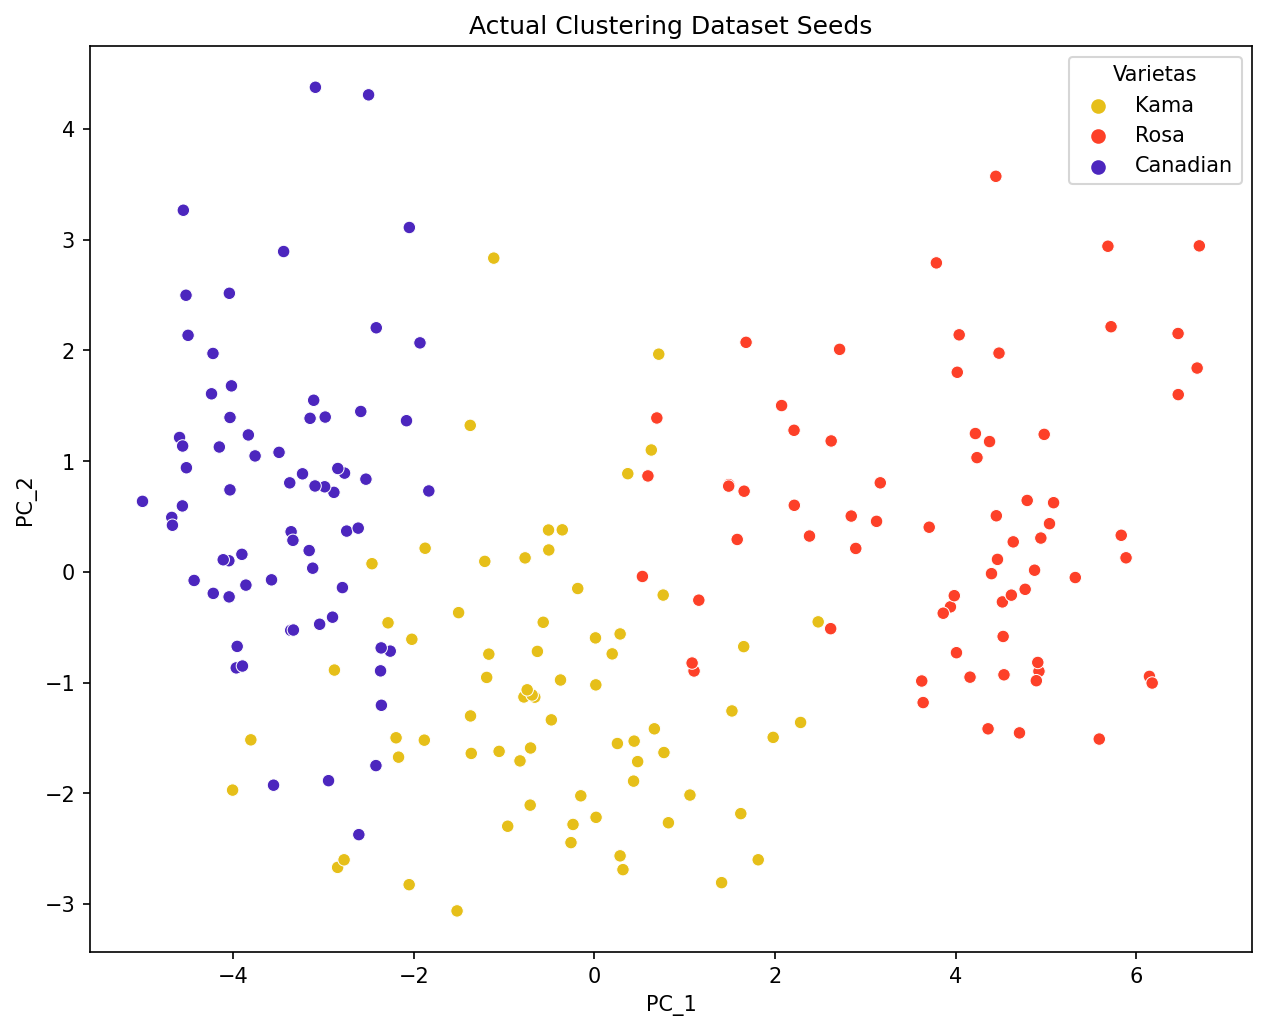

In [57]:
fig = plt.figure(figsize=(10, 8), 
                 dpi=150,
                 facecolor='white')

ax = sns.scatterplot(x=df_actual['PC_1'], 
                     y=df_actual['PC_2'], 
                     hue=df_actual['varieties'], 
                     hue_order=['Kama', 'Rosa', 'Canadian'],
                     palette=sns.color_palette('CMRmap_r', 3))

# set title legend
ax.legend(title="Varietas")

plt.title('Actual Clustering Dataset Seeds')

# simpan figure
plt.savefig('../output/figures/actual_cluster.png', 
            bbox_inches='tight')

Terlihat pada scatterpot diatas bahwa ada beberapa data point yang overlap dengan area cluster lainnya.

## Clustering

### KMeans 

In [58]:
from sklearn.cluster import KMeans

In [59]:
# set cluster ke 3
km_3 = KMeans(n_clusters=3)

# lakukan clustering
km_3.fit(X_reduced)

KMeans(n_clusters=3)

In [60]:
# label varieties hasil clustering
km_3.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0])

In [62]:
# copy dataframe X_reduce
df_kmeans = X_reduced.copy()

# assign feature varieties
df_kmeans['varieties'] = km_3.labels_

df_kmeans.head()

,PC_1,PC_2,varieties
0,0.663448,-1.417321,2
1,0.315667,-2.689229,2
2,-0.660499,-1.131506,2
3,-1.055276,-1.621190,2
4,1.619999,-2.183384,2


In [63]:
'''
informasi label yang diperoleh akan berubah setiap kali
KMeans dijalankan. Rubah nilai label secara manual.
'''
df_kmeans['varieties'].replace(to_replace={2: 'Kama', 1: 'Rosa', 0: 'Canadian'}, 
                               inplace=True)

df_kmeans.head()

,PC_1,PC_2,varieties
0,0.663448,-1.417321,Kama
1,0.315667,-2.689229,Kama
2,-0.660499,-1.131506,Kama
3,-1.055276,-1.621190,Kama
4,1.619999,-2.183384,Kama


In [85]:
# informasi centroid
km_centroids = km_3.cluster_centers_
km_centroids

array([[-3.32787801,  0.64576148],
       [ 4.33639856,  0.46609094],
       [-0.11491258, -1.08548863]])

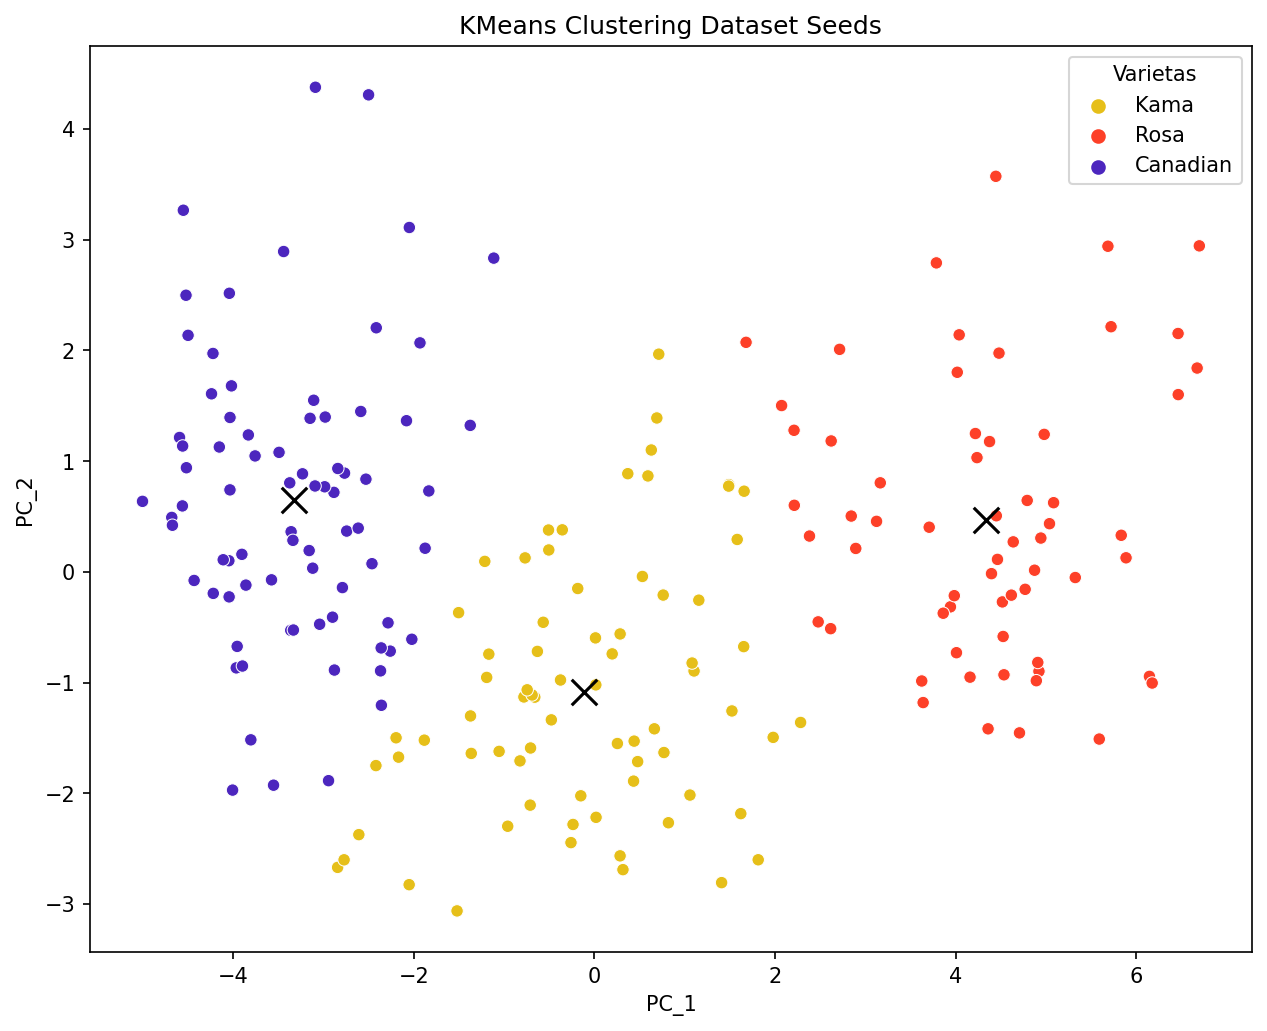

In [84]:
fig = plt.figure(figsize=(10, 8), 
                 dpi=150,
                 facecolor='white')

ax = sns.scatterplot(x=df_kmeans['PC_1'], 
                     y=df_kmeans['PC_2'], 
                     hue=df_kmeans['varieties'], 
                     hue_order=['Kama', 'Rosa', 'Canadian'],
                     palette=sns.color_palette('CMRmap_r', 3))

# plot centroids
plt.scatter(x=km_centroids[:, 0], 
            y=km_centroids[:, 1], 
            marker='x', 
            c='k', 
            s=150)

# set title legend
ax.legend(title="Varietas")

plt.title('KMeans Clustering Dataset Seeds')

# simpan figure
plt.savefig('../output/figures/kmeans_cluster.png', 
            bbox_inches='tight')

### Spectral Clustering

In [55]:
from sklearn.cluster import SpectralClustering

In [86]:
# set cluster ke 3
spec = SpectralClustering(n_clusters=3)

# lakukan clustering
spec.fit(X_reduced)

SpectralClustering(n_clusters=3)

In [87]:
# label varieties hasil clustering
spec.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 0, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [89]:
# copy dataframe X_reduce
df_spec = X_reduced.copy()

# assign feature varieties
df_spec['varieties'] = spec.labels_

df_spec.head()

,PC_1,PC_2,varieties
0,0.663448,-1.417321,2
1,0.315667,-2.689229,2
2,-0.660499,-1.131506,2
3,-1.055276,-1.621190,2
4,1.619999,-2.183384,2


In [91]:
'''
informasi label yang diperoleh akan berubah setiap kali
KMeans dijalankan. Rubah nilai label secara manual.
'''
df_spec['varieties'].replace(to_replace={2: 'Kama', 1: 'Rosa', 0: 'Canadian'}, 
                               inplace=True)

df_spec.head()

,PC_1,PC_2,varieties
0,0.663448,-1.417321,Kama
1,0.315667,-2.689229,Kama
2,-0.660499,-1.131506,Kama
3,-1.055276,-1.621190,Kama
4,1.619999,-2.183384,Kama


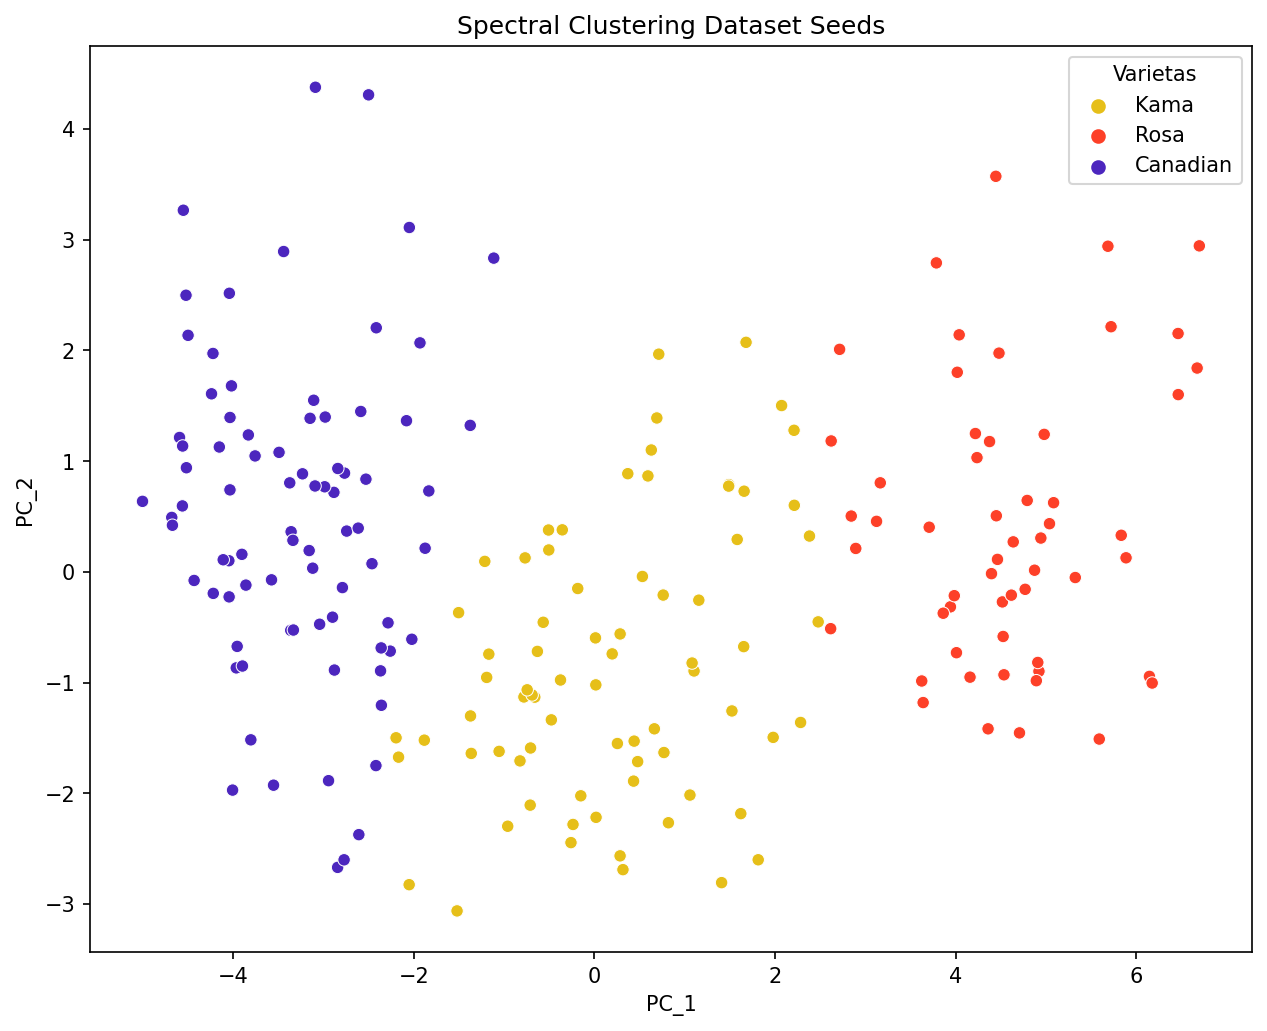

In [95]:
fig = plt.figure(figsize=(10, 8), 
                 dpi=150,
                 facecolor='white')

ax = sns.scatterplot(x=df_spec['PC_1'], 
                     y=df_spec['PC_2'], 
                     hue=df_spec['varieties'], 
                     hue_order=['Kama', 'Rosa', 'Canadian'],
                     palette=sns.color_palette('CMRmap_r', 3))

# set title legend
ax.legend(title="Varietas")

plt.title('Spectral Clustering Dataset Seeds')

# simpan figure
plt.savefig('../output/figures/spectral_cluster.png', 
            bbox_inches='tight')

## Kesimpulan

Baik KMeans dan Spectral clustering gagal untuk mengelompokkan dengan benar seluruh instance. Hal ini terjadi karena cluster actual(sebenarnya) dari dataset Seeds saling overlap.

## 

## Referensi

- [Complete Gradient Clustering Algorithm for Features Analysis of X-ray Images](http://home.agh.edu.pl/~slukasik/pub/017_Charytanowicz_Niewczas_Kulczycki_Kowalski_Lukasik_Zak_ITIB2010.pdf)

- [Topic 7. Unsupervised learning: PCA and clustering](https://www.kaggle.com/kashnitsky/topic-7-unsupervised-learning-pca-and-clustering)

- https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py

- [Clustering Performance Evaluation | Tutorialspoint](https://www.tutorialspoint.com/scikit_learn/scikit_learn_clustering_performance_evaluation.htm)